<h1> DENGUE ANALYSIS
<h3> Data Analyst: Esguerra</h3>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h1> 10 INSIGHTS</h1>

<h3> 1. Which month consistently reports the highest dengue cases over the years?</h1>

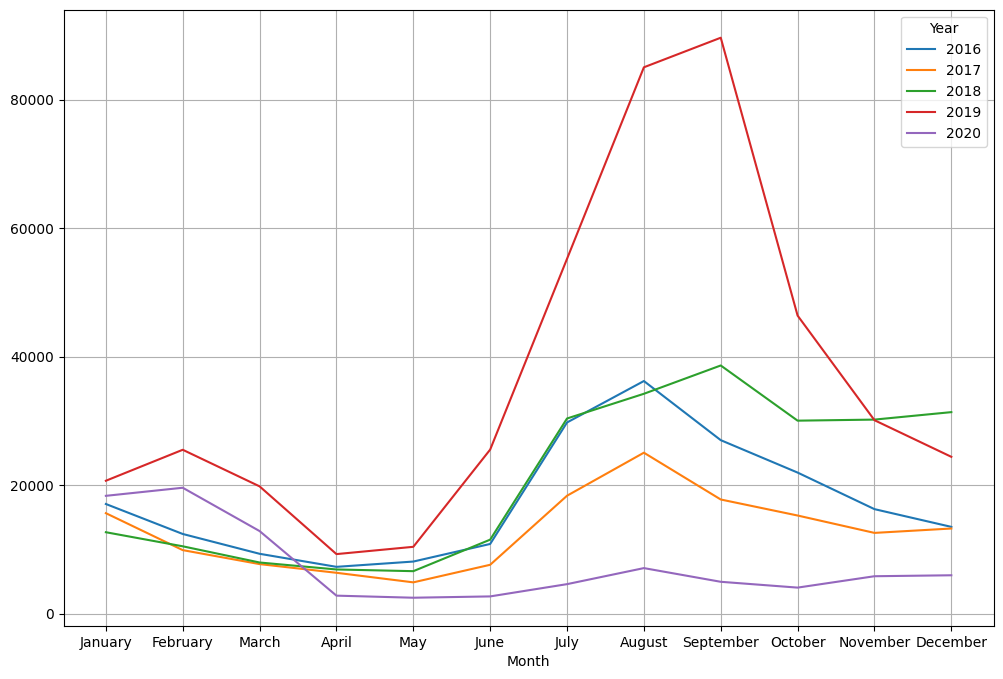

In [5]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
monthly_cases = dengue.groupby(['Month', 'Year'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<hr> Insight#1 - Dengue cases usually peak from July to September, with a big surge in 2019 during those months

<hr> Insight#2 - Dengue cases are consistently lowest from April to June, indicating a seasonal trend where the first half of the year has fewer cases

<h1> 2. How many dengue cases were reported each year from 2016 to 2020 across all regions?</h1>

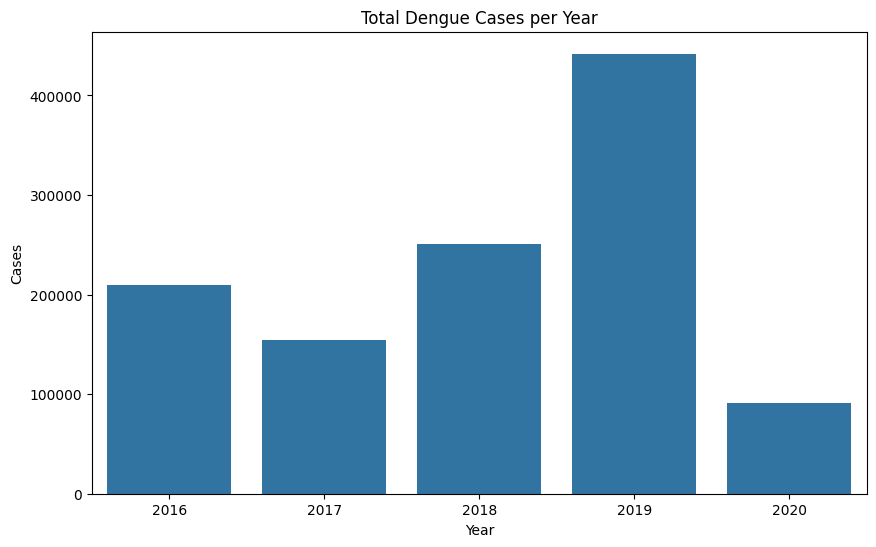

In [6]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_cases, x='Year', y='Dengue_Cases')
plt.title('Total Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.show()

<hr> Insight#3 - Dengue cases were highest in 2019, with about 430,000 people getting dengue, much more than in other years

<h1> 3. Which year had the highest dengue death rate?</h1>

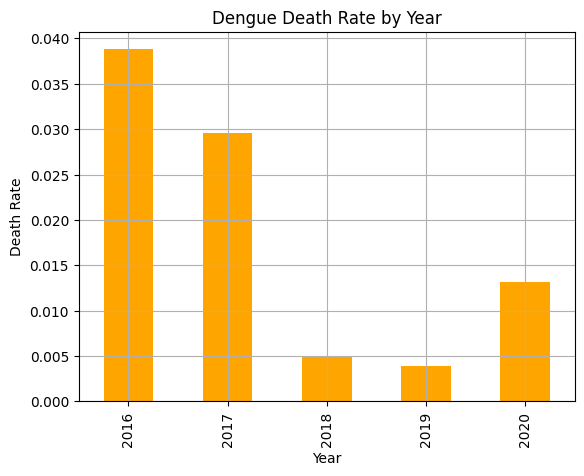

In [7]:
yearly = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()
yearly['Death_Rate'] = yearly['Dengue_Deaths'] / yearly['Dengue_Cases']

yearly['Death_Rate'].plot(kind='bar', color='orange')
plt.title('Dengue Death Rate by Year')
plt.ylabel('Death Rate')
plt.grid(True)
plt.show()

<hr> Insight#4 - 2016 had the highest dengue death rate, around 0.039, while the rate dropped sharply in the following years—reaching its lowest point in 2019 at just 0.003

<h1> 4. Which region had the highest dengue death?</h1>

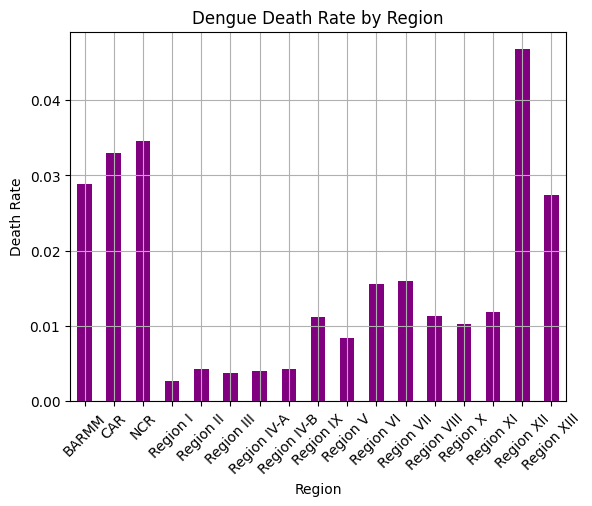

In [8]:
region = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
region['Death_Rate'] = region['Dengue_Deaths'] / region['Dengue_Cases']

region['Death_Rate'].plot(kind='bar', color='purple')
plt.title('Dengue Death Rate by Region')
plt.ylabel('Death Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<hr> Insight#5 - Region XII has the highest dengue death rate, slightly above 0.04, making it the most affected area in terms of death

<h1> 5. Is there a correlation between dengue cases and deaths across regions?</h1>

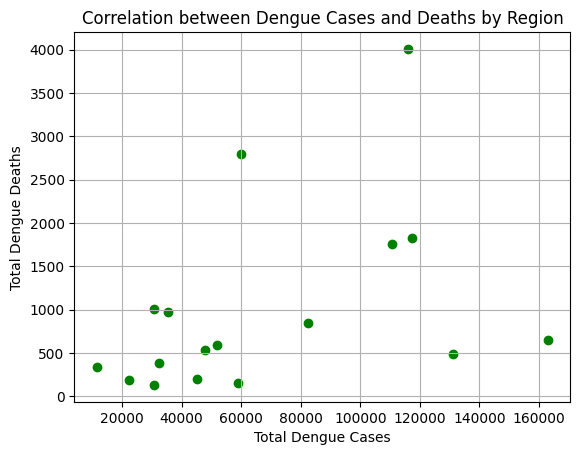

In [9]:
region = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()

plt.scatter(region['Dengue_Cases'], region['Dengue_Deaths'], color='green')
plt.title('Correlation between Dengue Cases and Deaths by Region')
plt.xlabel('Total Dengue Cases')
plt.ylabel('Total Dengue Deaths')
plt.grid(True)
plt.show()

<hr> Insight#6 - Regions with more dengue cases tend to report more deaths, showing a positive correlation

<hr> Insigh#7 - Some regions with fewer dengue cases still show notable death counts

<h1> 6. Which region had the lowest average monthly dengue cases?</h1>

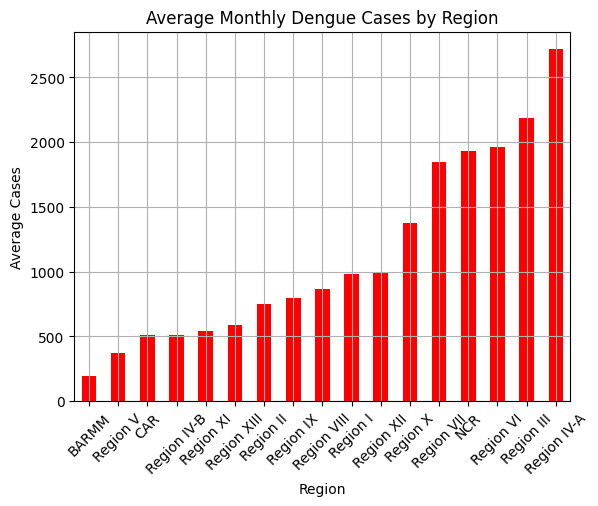

In [10]:
region_avg = dengue.groupby('Region')['Dengue_Cases'].mean().sort_values()

region_avg.plot(kind='bar', color='red')
plt.title('Average Monthly Dengue Cases by Region')
plt.ylabel('Average Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<hr> Insight#8 - BARMM has the lowest average monthly dengue cases, indicating it experiences fewer dengue incidents compared to other regions

<h1> 7. Which region had the highest spike in dengue cases in a single month? </h1>

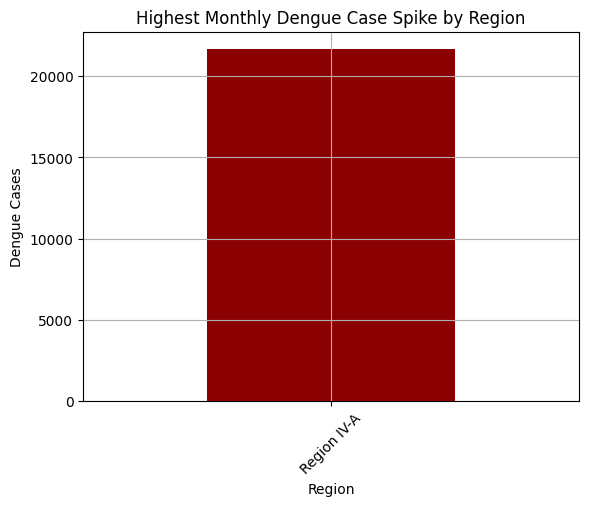

In [13]:
monthly = dengue.groupby(['Region', 'Year', 'Month'])['Dengue_Cases'].sum().reset_index()
peak = monthly.sort_values(by='Dengue_Cases', ascending=False).head(1)

peak.set_index('Region')['Dengue_Cases'].plot(kind='bar', color='darkred')
plt.title('Highest Monthly Dengue Case Spike by Region')
plt.ylabel('Dengue Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<hr> Insight#9 - Region IV-A experienced an extreme dengue outbreak, with nearly 20,000 cases in a single month

<hr> Insight#10 - The spike in Region IV-A far exceeds typical monthly case volumes, indicating an remarkable surge that goes well beyond the region’s usual dengue activity